In [1]:

# chi-squared test with similar proportions for 500 sequences
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
# #first array is Fasttree 500 topology and second array is Raxml 500 topology
# table = [	[1325, 1282,25887,28,38,1245,28,36,36,27,32,31,1190,35,30],
# 			[1346, 1279,25952,31,32,1268,24,27,44,19,28,32,1093,39,36]]

# #first array is Fasttree 500 topology and second array is MrBayes 500 topology
# table = [	[1325, 1282,25887,28,38,1245,28,36,36,27,32,31,1190,35,30],
# 			[863, 887,24843,7,6,809,4,7,11,4,6,7,737,8,13]]

#first array is MrBayes 500 topology and second array is Raxml 500 topology
table = [	[863, 887,24843,7,6,809,4,7,11,4,6,7,737,8,13],
			[1346, 1279,25952,31,32,1268,24,27,44,19,28,32,1093,39,36]]


print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[863, 887, 24843, 7, 6, 809, 4, 7, 11, 4, 6, 7, 737, 8, 13], [1346, 1279, 25952, 31, 32, 1268, 24, 27, 44, 19, 28, 32, 1093, 39, 36]]
dof=14
[[1.04806949e+03 1.02766796e+03 2.40999048e+04 1.80292624e+01
  1.80292624e+01 9.85441526e+02 1.32847197e+01 1.61314453e+01
  2.60949850e+01 1.09124483e+01 1.61314453e+01 1.85037167e+01
  8.68251320e+02 2.22993508e+01 2.32482594e+01]
 [1.16093051e+03 1.13833204e+03 2.66950952e+04 1.99707376e+01
  1.99707376e+01 1.09155847e+03 1.47152803e+01 1.78685547e+01
  2.89050150e+01 1.20875517e+01 1.78685547e+01 2.04962833e+01
  9.61748680e+02 2.47006492e+01 2.57517406e+01]]
probability=0.950, critical=23.685, stat=367.282
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


      principal component 1  principal component 2
0                 -0.186476               0.014449
1                 -0.169275               0.018184
2                 -0.152503               0.036730
3                 -0.171392               0.026782
4                 -0.125586               0.080283
...                     ...                    ...
3121               0.196960              -0.008328
3122               0.202457              -0.061280
3123               0.547957              -0.070485
3124               0.407828               0.016421
3125              -0.197037               0.007440

[3126 rows x 2 columns]
   origin component 1  origin component 2
0           -0.197037             0.00744


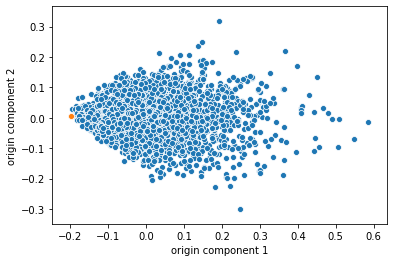

In [2]:
                    #PCA PLOTSSSS

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
sequence = "500"

##UNCOMMENT FOR FASTTRESS
col=['V1','V2','V3','V4','V5','V6','V7']
df = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/RAxML_dataset_" + sequence + "_averagesVI.csv",usecols=col)
df.loc[3125]= [0,0,0,0,0,0,0]

#UNCOMMENT FOR MRBAYES
# col=['c_ab','c_de','V3','V4','V5','V6','V7']
# df = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_" + sequence + "_full.csv",usecols=col)
# df.loc[31250]= [0,0,0,0,0,0,0]


features = col
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
#x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

originData = {'origin component 1':[principalDf.at[3125,'principal component 1']],'origin component 2': [principalDf.at[3125,'principal component 2']]}
principalOrigin = pd.DataFrame(originData, columns = ['origin component 1','origin component 2'])

image = sns.scatterplot(x="principal component 1", y="principal component 2", data=principalDf)
image = sns.scatterplot(x="origin component 1", y="origin component 2", data=principalOrigin)


fig = image.get_figure()
fig.savefig(data_dir + "RAxML_dataset_" + sequence + "_Averages_PCA.png") 






print(principalDf)
print(principalOrigin)

Training Regressor...
done in 59.604s
Test R2 score: 0.20
Computing partial dependence plots...
done in 50.542s
Training Regressor...
done in 140.014s
Test R2 score: 0.19
Computing partial dependence plots...
done in 49.850s
Training Regressor...
done in 99.525s
Test R2 score: 0.99
Computing partial dependence plots...
done in 52.999s
Training Regressor...
done in 71.092s
Test R2 score: 0.31
Computing partial dependence plots...
done in 53.071s
Training Regressor...
done in 97.885s
Test R2 score: 0.19
Computing partial dependence plots...
done in 53.108s
Training Regressor...
done in 72.240s
Test R2 score: 0.99
Computing partial dependence plots...
done in 53.111s
Training Regressor...
done in 162.493s
Test R2 score: 0.24
Computing partial dependence plots...
done in 52.670s
                    R2
1  Test R2 score: 0.20
2  Test R2 score: 0.19
3  Test R2 score: 0.99
4  Test R2 score: 0.31
5  Test R2 score: 0.19
6  Test R2 score: 0.99
7  Test R2 score: 0.24


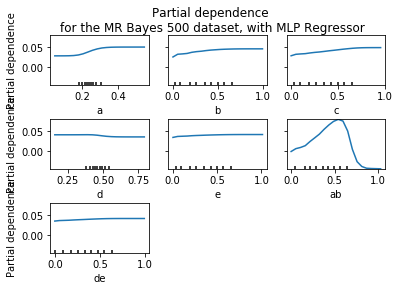

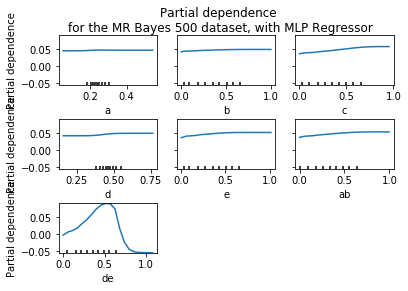

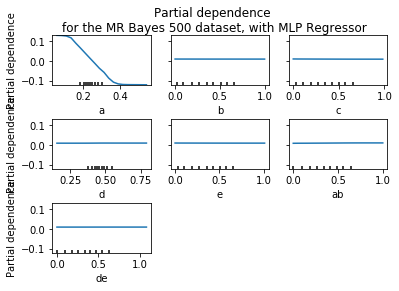

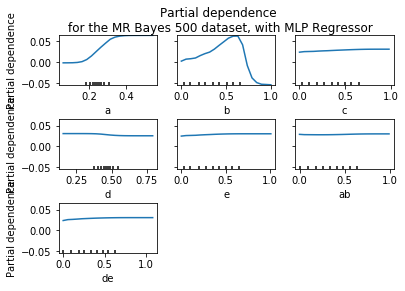

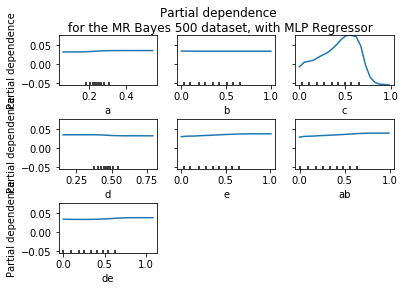

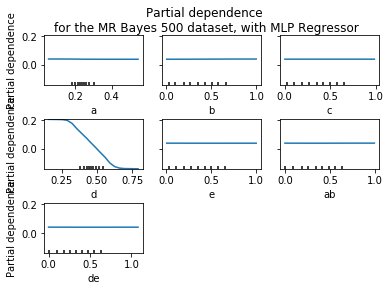

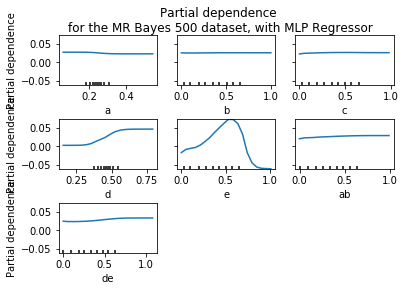

In [45]:
#cODE TO CREATE PDP PLOT FROM SCIKIT LEARN
#data for sci kit learn pdp plots

import pandas as pd
import os
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

# cal_housing = fetch_california_housing()
# X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
# print(X)
# y = cal_housing.target

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
seqNum = '500'
csv_dir = data_dir + "MrBayes_" + seqNum + "_full.csv"
est_data = pd.read_csv(csv_dir, sep = ',')
est_data2 = pd.read_csv(csv_dir, sep = ',')
est_data3 = pd.read_csv(csv_dir, sep = ',')

dfR = pd.DataFrame(0, index= range(1,8),columns = ['R2'])

t = 0.7
s = 100
for i in range (1,8,1):
    m = i
    # if (m == 1):
    #     est_data = est_data[est_data['ab'].between(t, s)]
    # if (m == 2):
    #     est_data = est_data[est_data['de'].between(t, s)]
    # if (m == 4):
    #     est_data = est_data[est_data['b'].between(t, s)]
    # if (m == 5):
    #     est_data = est_data[est_data['c'].between(t, s)]
    # if (m == 7):
    #     est_data = est_data[est_data['e'].between(t, s)]

    X = est_data.loc[:,:'de']
    # not sure why raxml does not have the column wrong topology so we need to ask if comenting this makes any change??
    # UNCOMMENT THIS TO REMOVE ZEROS FROM MRBAYES

    X2 = est_data2.loc[:,:'de']
    X2 = X2[est_data2.c_ab != 0]
    X3 = est_data3.loc[:,:'de']
    X3 = X3[est_data3.c_de != 0]
    y = est_data['wrong_topo']
    # print(X2['c_ab'])

    # print(X3)

    # UNCOMMENT THIS TO REMOVE ZEROS FROM MRBAYES

    y1 = est_data2[est_data2.c_ab != 0]
    y1 = y1['c_ab']
    y2 = est_data3[est_data3.c_de != 0]
    y2 = y2['c_de']

    #UNCOMMENT FOR REGULAR CODE
    # y1 = est_data['V1']
    # y2 = est_data['V2']
    y3 = est_data['V3']
    y4 = est_data['V4']
    y5 = est_data['V5']
    y6 = est_data['V6']
    y7 = est_data['V7']

#     print(len(X2))
#     print(len(X3))


    #Note that train_test_split shuffle default is True
    #REPLACE X BY X2 AND X3 FOR MRBAYES
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y1,
                                                            test_size = 0.2,
                                                            random_state=10)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y2,
                                                            test_size = 0.2,
                                                            random_state=10)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3,
                                                            test_size = 0.2,
                                                            random_state=10)
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4,
                                                            test_size = 0.2,
                                                            random_state=10)
    X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y5,
                                                            test_size = 0.2,
                                                            random_state=10)
    X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y6,
                                                            test_size = 0.2,
                                                            random_state=10)
    X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y7,
                                                            test_size = 0.2,
                                                            random_state=10)
    # X_train3, X_test3, y_train3, y_test3 = train_test_split(
    #     X.drop('a', axis=1), est_data.V3,
    #     test_size = 0.2, random_state=10)
    # X_train6, X_test6, y_train6, y_test6 = train_test_split(
    #     X.drop('d', axis=1), est_data.V6,
    #     test_size = 0.2, random_state=10)
    # X_train, X_test, y_train, y_test = train_test_split(
    #      X.filter(['cd','ab','ce','ac','de','bc']), 
    #      y, test_size = 0.2, random_state=10)

    #List of vectors numbers that are used
    train_Vs = list(range(1, 8))
    skipped_Vs = [1, 2, 3, 4, 5,6, 7]


    print("Training Regressor...")
    tic = time()
    
    # UNCOMMENT THIS TO USE THE MLP REGRESSOR INSTEAD OF RF
    est = make_pipeline(QuantileTransformer(),
                        MLPRegressor(hidden_layer_sizes=(500, 500),
                                     learning_rate_init=0.01,
                                     early_stopping=True,max_iter=200))

#  RF regressor:
#
#     est = make_pipeline(QuantileTransformer(),
#                         RandomForestRegressor(n_estimators=100, random_state=0))

    est.fit(eval('X_train' + str(m)) , eval('y_train' + str(m)))
    print(f"done in {time() - tic:.3f}s")
    print(f"Test R2 score: {est.score(eval('X_test' + str(m)), eval('y_test' + str(m))):.2f}")

    dfR.loc[m , 'R2'] = f"Test R2 score: {est.score(eval('X_test' + str(m)), eval('y_test' + str(m))):.2f}"

    print('Computing partial dependence plots...')
    tic = time()
    features = ['a', 'b', 'c', 'd', 'e', 'ab','de']
    display = plot_partial_dependence(
           est, eval('X_train' + str(m)), features, 
           n_jobs=3, grid_resolution=20, percentiles=[0, 1]
    )
    print(f"done in {time() - tic:.3f}s")
    display.figure_.suptitle(
        'Partial dependence \n'
        'for the MR Bayes 500 dataset, with MLP Regressor'
    )
    
#     display.figure_.set_displaywidth(8)
#     display.figure_.set_displayheight(15)
#     display.figure_.tight_layout()
    s = display.figure_.subplots_adjust(hspace=0.7)
   
    #display.figure_.savefig("MLP_pdp_scikitlearn_V{}_MrBayes_500_.png".format(m))

print(dfR)
dfR.to_csv('/Users/Eric Aragundi/Desktop/anaconda files/MLP_MrBayes_500_hidden_layers_500,500.csv',index=False)

In [1]:
# -----------------------------LINEAR REGRESSION USING STATSMODEL---------------------------------#

from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import os
import numpy

data_dir      = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
csv_dir = data_dir + "FastTree_500.csv"
est_data = pd.read_csv(csv_dir, sep=',')


arrR2 = []
arr2R2 = []
i = 4
for t in numpy.arange(0.5 , 0.8 , 0.02):
    est_data2 = pd.read_csv(csv_dir, sep=',')

    
    p = 0
    s = 1
        
    print("left side of breakpoint t")
    print( "For p = " + str(p))
    print( "For t = " + str(t))

    
    if (i == 1):
        est_data2 = est_data2[est_data2['ab'].between(p, t)]
    if (i == 2):
        est_data2 = est_data2[est_data2['de'].between(p, t)]
    if (i == 4):
        est_data2 = est_data2[est_data2['b'].between(p, t)]
    if (i == 5):
        est_data2 = est_data2[est_data2['c'].between(p, t)]
    if (i == 7):
        est_data2 = est_data2[est_data2['e'].between(p, t)]
    X = est_data2.loc[:,:'de']
    y = est_data2['wrong_topo']
    y1 = est_data2['V1']
    y2 = est_data2['V2']
    y3 = est_data2['V3']
    y4 = est_data2['V4']
    y5 = est_data2['V5']
    y6 = est_data2['V6']
    y7 = est_data2['V7']

    # poly = PolynomialFeatures(degree=2)
    # X_poly = poly.fit_transform(X)
    V1_linear = sm.OLS(y1,X).fit()
    V2_linear = sm.OLS(y2,X).fit()
    V4_linear = sm.OLS(y4,X).fit()
    V5_linear = sm.OLS(y5,X).fit()
    V7_linear = sm.OLS(y7,X).fit()

    #print(est_data)
    if (i == 1):
        print("V1 linear model descriptive stats")
        print('R2: ',V1_linear.rsquared)
    if (i == 2):
        print("V2 linear model descriptive stats")
        print('R2: ',V2_linear.rsquared)
    if (i == 4):
        print("V4 linear model descriptive stats")
        print('R2: ',V4_linear.rsquared)
        arrR2.append(V4_linear.rsquared)
        print(est_data2.shape[0])  
        left_R2 = V4_linear.rsquared
        Left_Data_num = est_data2.shape[0]
    if (i == 5):
        arrR2.append(V5_linear.rsquared)
        print("V5 linear model descriptive stats")
        print('R2: ',V5_linear.rsquared)
        print(est_data2.shape[0])  
        left_R2 = V5_linear.rsquared
        Left_Data_num = est_data2.shape[0]
    if (i == 7):
        arrR2.append(V7_linear.rsquared)
        print("V7 linear model descriptive stats")
        print('R2: ',V7_linear.rsquared)
        print(est_data2.shape[0])  
        left_R2 = V7_linear.rsquared
        Left_Data_num = est_data2.shape[0]
      
    
    p = 0
    s = 1
        
    print("right side of breakpoint t")
    print( "For t = " + str(t))
    print( "For s = " + str(s))

    
    if (i == 1):
        est_data = est_data[est_data['ab'].between(t, s)]
    if (i == 2):
        est_data = est_data[est_data['de'].between(t, s)]
    if (i == 4):
        est_data = est_data[est_data['b'].between(t, s)]
    if (i == 5):
        est_data = est_data[est_data['c'].between(t, s)]

    if (i == 7):
        est_data = est_data[est_data['e'].between(t, s)]
    X = est_data.loc[:,:'de']
    y = est_data['wrong_topo']
    y1 = est_data['V1']
    y2 = est_data['V2']
    y3 = est_data['V3']
    y4 = est_data['V4']
    y5 = est_data['V5']
    y6 = est_data['V6']
    y7 = est_data['V7']

    # poly = PolynomialFeatures(degree=2)
    # X_poly = poly.fit_transform(X)
    V1_linear = sm.OLS(y1,X).fit()
    V2_linear = sm.OLS(y2,X).fit()
    V4_linear = sm.OLS(y4,X).fit()
    V5_linear = sm.OLS(y5,X).fit()
    V7_linear = sm.OLS(y7,X).fit()

    #print(est_data)
    if (i == 1):
        print("V1 linear model descriptive stats")
        print('R2: ',V1_linear.rsquared)
    if (i == 2):
        print("V2 linear model descriptive stats")
        print('R2: ',V2_linear.rsquared)
    if (i == 4):
        arr2R2.append(V4_linear.rsquared)
        print("V4 linear model descriptive stats")
        print('R2: ',V4_linear.rsquared)
        print(est_data.shape[0])
        right_R2 = V4_linear.rsquared
        Right_Data_num = est_data.shape[0]
        
    if (i == 5):
        arr2R2.append(V5_linear.rsquared)
        print("V5 linear model descriptive stats")
        print('R2: ',V5_linear.rsquared)
        print(est_data.shape[0])  
        right_R2 = V5_linear.rsquared
        Right_Data_num = est_data.shape[0]
    if (i == 7):
        arr2R2.append(V7_linear.rsquared)
        print("V7 linear model descriptive stats")
        print('R2: ',V7_linear.rsquared)
        print(est_data.shape[0])
        right_R2 = V7_linear.rsquared
        Right_Data_num = est_data.shape[0]
        
    
    W_avg = ((left_R2 * Left_Data_num) + (right_R2 * Right_Data_num))/(Left_Data_num + Right_Data_num) 
    print("Weighted average :" + str(W_avg))
    print("done\n")

    

left side of breakpoint t
For p = 0
For t = 0.5
V4 linear model descriptive stats
R2:  0.20806830450162084
20278
right side of breakpoint t
For t = 0.5
For s = 1
V4 linear model descriptive stats
R2:  0.2806734493857339
10968
Weighted average :0.23355423003093506
done

left side of breakpoint t
For p = 0
For t = 0.52
V4 linear model descriptive stats
R2:  0.21329756286757973
21098
right side of breakpoint t
For t = 0.52
For s = 1
V4 linear model descriptive stats
R2:  0.27568931629316773
10148
Weighted average :0.2335610050285881
done

left side of breakpoint t
For p = 0
For t = 0.54
V4 linear model descriptive stats
R2:  0.21549472991451135
21939
right side of breakpoint t
For t = 0.54
For s = 1
V4 linear model descriptive stats
R2:  0.2682980961943463
9307
Weighted average :0.23122285287317562
done

left side of breakpoint t
For p = 0
For t = 0.56
V4 linear model descriptive stats
R2:  0.21680783530876802
22843
right side of breakpoint t
For t = 0.56
For s = 1
V4 linear model descrip

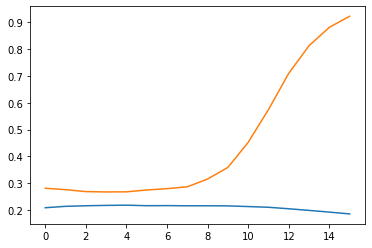

In [2]:
pd.Series(arrR2).plot()
pd.Series(arr2R2).plot()

In [19]:
# USE THIS CODE TO FIX THE ESTIMATED TREES WHENEVER THE BRANCHES a AND b ARE FIRST INSTEAD OF d AND e

# FIX THE ERROR , branch lenght should be switched when branches are switched

import os
count = 0
count2 = 0
count3 = 0
count4 = 0

for p in range (2,75,18):
    folder_num = "B{:02d}".format(p)

    data_dir      = "/Users/Eric Aragundi/Desktop/anaconda files/Estimated Fasttree 1000/"+ folder_num + "/"

    



    for i in range(2,75,18):
        for j in range(2,75,18):
            for k in range(2,75,18):
                for l in range(2,75,18):
                    for m in range(1,11):
                        file_dir = "Estimated_Tree_"+ folder_num + "_1M{:02d}_C{:02d}_2M{:02d}_E{:02d}_0{:02d}.txt".format(i,j,k,l,m,i,j,k,l,m)
                        t_dir = data_dir + file_dir
                        t_data = open(t_dir)
                        s = str(t_data.read())

                        if ( (s[1] == 'a' and s[11] == 'b') or (s[1] == 'b' and s[11] == 'a')):
                             if (s[1] != '('):

                                s1 = s[1:20]
                                s2 = s[20:33]
                                s3 = s[33:52]
                                s4 = s[52:72]
                                s41 = s4[0:2]
                                s42 = s4[2:9]
                                s43 = s4[9:11]
                                s44 = s4[11:18]
                                s45 = s4[18:20]
                                s4 = s41  + s44 + s43 + s42 + s45

                                line1 = "(" + s3 + s2 + s1 + s4 + "\n"

                               
                                
                                if ( (s3[0] == 'd' and s3[10] == 'e') or (s3[0] == 'a' and s3[10] == 'd') ):
#                                     print("first pattern")
#                                     print(file_dir)
                                    
#                                     print(s1)
#                                     print(s2)
#                                     print(s3)
#                                     print(s4)
#                                     print(s41)
#                                     print(s42)
#                                     print(s43)
#                                     print(s44)
#                                     print(s45)
                                    


#                                     print("New String: " + line1)

#                                     print("Old String: " + s)
                                    

                                    t_data.close()
                                    os.remove(data_dir + file_dir)

                                    f= open(data_dir + file_dir,"w+")
                                    f.write(line1)
                                    f.close()




                                    count += 1

                                    #print(s)
                            #print("DONE pattern 1")        
                        if (( s[2] == 'd' and s[12] == 'e' ) or (s[2] == 'e' and s[12] == 'd')):




                            st1 = s[2:21]
                            st2 = s[21:23]
                            st3 = s[23:30]
                            st4 = s[30:42]
                            st5 = s[42:61]
                            st6 = s[61:63]
                            st7 = s[63:70]
                            st8 = s[70:72]


                            line2 = "((" + st5 + st2 + st7 + st4 + st1 + st6 + st3 + st8 + "\n"
                            if ( (st5[0] == 'a' and st5[10] == 'b') or (st5[0] == 'b' and st5[10] == 'a') ):
                                    
#                                     print("second pattern")
#                                     print(file_dir)
#                                     print(st1)
#                                     print(st2)
#                                     print(st3)
#                                     print(st4)
#                                     print(st5)
#                                     print(st6)
#                                     print(st7)
#                                     print(st8)
                                    
#                                     print("Old string: " + s)
#                                     print("New String: ((" + st5 + st2 + st7 + st4 + st1 + st6 + st3 + st8)
#                                     print("\n")

                                    t_data.close()
                                    os.remove(data_dir + file_dir)
                                    f= open(data_dir + file_dir,"w+")
                                    f.write(line2)
                                    f.close()

                                    count2 += 1
    
#                                    print("DONE pattern 2 \n") 

                        if ( (s[12] == 'd' and s[22] == 'e') or (s[12] == 'e' and s[22] == 'd')) :





                            str1 = s[1:12]
                            str2 = s[12:40]
                            str3 = s[40:42]
                            str4 = s[42:70]
                            str5 = s[70:72]



                            line3 = "(" + str1 + str4 + str3 + str2 + str5 + "\n"
        
                            if ( (str4[0] == 'a' and str4[10] == 'b') or (str4[0] == 'b' and str4[10] == 'a') ):
                
                                
                
                
#                                 print("third pattern")
#                                 print(file_dir)
                
#                                 print("Old string: " + s)
#                                 print(str1)
#                                 print(str2)
#                                 print(str3)
#                                 print(str4)
#                                 print(str5)

#                                 print("New String: (" + str1 + str4 + str3 + str2 + str5)
#                                 print("\n")


                                t_data.close()
                                os.remove(data_dir + file_dir)
                                f= open(data_dir + file_dir,"w+")
                                f.write(line3)
                                f.close()


                                count3 += 1

# #                         print("DONE pattern 3") 

#                         if ( s == "(c:0.45267,(a:0.25107,b:0.56901):0.43422,(d:0.40601,e:0.58544):0.42970);" ) :
#                               print(file_dir)

#                               #print("Old string: " + s)

#                               count4 += 1

print("amount of files pattern 1 : " + str(count))
print("amount of files pattern 2 : " + str(count2))
print("amount of files pattern 3 : " + str(count3))
print("amount of files pattern 4 : " + str(count4))


print("DONE")








                    

amount of files pattern 1 : 0
amount of files pattern 2 : 0
amount of files pattern 3 : 0
amount of files pattern 4 : 0
DONE


In [16]:
str1 = "probando para grabar las strings"
f= open("try.txt","w+")
f.write(str1)
f.close()

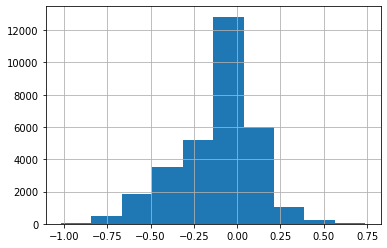

In [4]:
import os
import pandas as pd

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
seqNum = '500'
csv_dir = data_dir + "new_FastTree_" + seqNum + ".csv"
est_data = pd.read_csv(csv_dir, sep = ',')
est_data
est_data["V1"].hist()


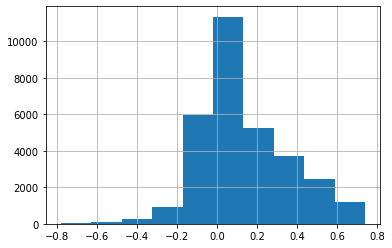

In [5]:
est_data["V2"].hist()


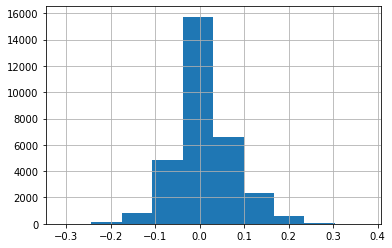

In [6]:
est_data["V4"].hist()

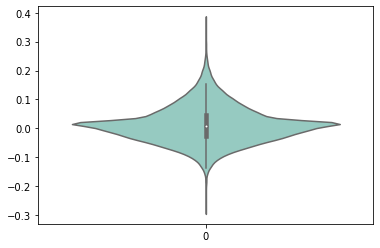

In [6]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
seqNum = '1000'
csv_dir = data_dir + "FastTree_" + seqNum + ".csv"
data = pd.read_csv(csv_dir, sep = ',')

data1 = data[data['ab'].between(0.0000001, 10)]

data2 = data1["orgAB"] - data1["ab"]

data2.reset_index(drop=True, inplace=True)

data2[0]




#data2.hist()
g1 = sns.violinplot(data=data2,palette='Set3')


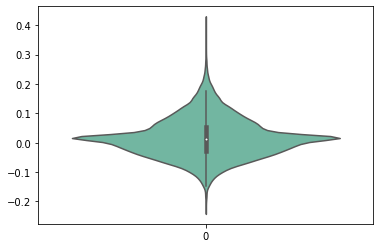

In [7]:
import pandas as pd
import os
import seaborn as sns

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
seqNum = '1000'
csv_dir = data_dir + "FastTree_" + seqNum + ".csv"
data = pd.read_csv(csv_dir, sep = ',')

data3 = data[data['de'].between(0.0000001, 10)]

data4 = data3["orgDE"] - data3["de"]

data4.reset_index(drop=True, inplace=True)

data2[0]

#data4
#data4.hist()
g1 = sns.violinplot(data=data4,palette='Set2')

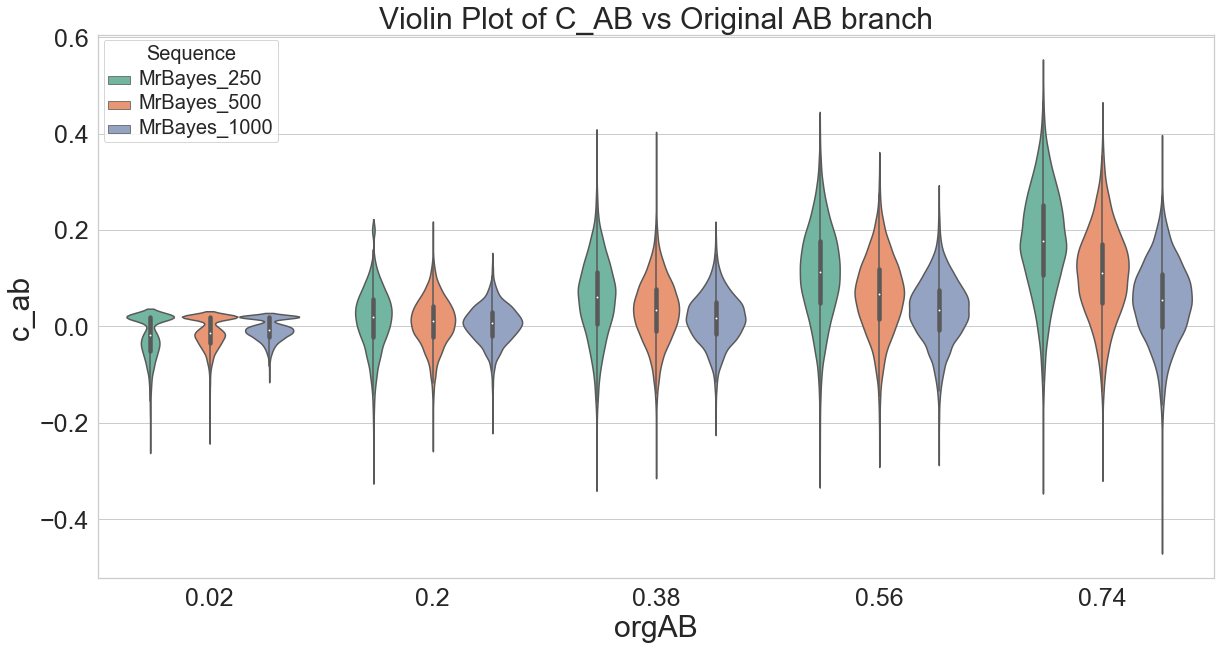

In [3]:
# ---------------------------------------------Visualization----------------------------------------------#

#USE THIS CODE FOR FASTTREES VIOLIN PLOTS WITH ZERO REMOVES AND GET AB AND DE BY CALCULATION

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

data_dir      = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
dir_250  = data_dir + "MrBayes_250_full.csv"
dir_500  = data_dir + "MrBayes_500_full.csv"
dir_1000 = data_dir + "MrBayes_1000_full.csv"

data250 = pd.read_csv(dir_250, sep = ',')
data500 = pd.read_csv(dir_500, sep = ',')
data1000 = pd.read_csv(dir_1000, sep = ',')

#UNCOMENT TO WORK WITH MRBAYES removing zeros
# #uncomment to removes 0 in the  DE column 
# data250 = data250[data250.c_de != 0]
# data500 = data500[data500.c_de != 0]
# data1000 = data1000[data1000.c_de != 0]

# #uncoment to remove 0 in the AB column
data250 = data250[data250.c_ab != 0]
data500 = data500[data500.c_ab != 0]
data1000 = data1000[data1000.c_ab != 0]

#UNCOMMENT FOR FASTTREES to remove zeros
# #uncomment to removes 0 in the  DE column 
# data250 = data250[data250['de'].between(0.00000001, 100)]
# data250["de"] = data250["orgDE"] - data250["de"]
# data500 = data500[data500['de'].between(0.00000001, 100)]
# data500["de"] = data500["orgDE"] - data500["de"]
# data1000 = data1000[data1000['de'].between(0.00000001, 100)]
# data1000["de"] = data1000["orgDE"] - data1000["de"]

# #uncoment to remove 0 in the AB column
# # data250 = data250[data250['ab'].between(0.00000001, 100)]
# # data250["ab"] = data250["orgAB"] - data250["ab"]
# # data500 = data500[data500['ab'].between(0.00000001, 100)]
# # data500["ab"] = data500["orgAB"] - data500["ab"]
# # data1000 = data1000[data1000['ab'].between(0.00000001, 100)]
# # data1000["ab"] = data1000["orgAB"] - data1000["ab"]

data250["Sequence"] = 'MrBayes_250'
data500["Sequence"] = 'MrBayes_500'
data1000["Sequence"] = 'MrBayes_1000'

#data1000['ab'].hist(bins =50)
li   = [data250,data500, data1000]
huge_df = pd.concat(li,ignore_index=True)

# f_ls = [dir_250,dir_500,dir_1000]
# li   = []
# for i in range(3):
#     df = pd.read_csv(f_ls[i], index_col=None, header=0)
#     if i == 0:
#         df['Sequence'] = 'Fasttree_250' 
#     elif i == 1:
#         df['Sequence'] = 'Fasttree_500'
#     else:
#         df['Sequence'] = 'Fasttree_1000'
#     li.append(df)
# huge_df = pd.concat(li,ignore_index=True)

huge_df = huge_df.filter(['orgB','V4','orgC','V5','orgE','V7',
                          'orgAB','V2','orgDE','V1','ErrV1',
                          'ErrV2','ErrV4','ErrV5','ErrV7','c_ab','c_de','ab','de',
                          'topology','Sequence'])
#huge_df = huge_df[huge_df['orgE'].between(0.15, 0.75)]
# Plot the relationship between original branch and logmap vector
sns.set(style='whitegrid',
        rc={'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':25})
g1 = sns.violinplot(x='orgAB',y='c_ab',data=huge_df,hue='Sequence',palette='Set2')
plt.title('Violin Plot of C_AB vs Original AB branch',size=30)
plt.setp(g1.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(g1.get_legend().get_title(), fontsize='20') # for legend title
plt.savefig('new_MrBayes_violin_C_AB_orgAB_.png')


ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
#CODE TO REMOVE LETTERS FROM COORDINATES AT MR BAYES
import os

for p in range (2,75,18):
    folder_num = "B{:02d}".format(p)

    data_dir      = "/Users/Eric Aragundi/Desktop/anaconda files/mb_coordinate_250/"+ folder_num + "/"

    count = 0
    count2 = 0
    count3 = 0
    count4 = 0


    print("Start!")
    for i in range(2,75,18):
        for j in range(2,75,18):
            for k in range(2,75,18):
                for l in range(2,75,18):
                    for m in range(1,11):
                        file_dir = "Coordinate_Tree_"+ folder_num + "_1M{:02d}_C{:02d}_2M{:02d}_E{:02d}_0{:02d}.txt".format(i,j,k,l,m,i,j,k,l,m)
                        t_dir = data_dir + file_dir
                        t_data = open(t_dir)
                        s = str(t_data.readline())
                        
                        t_data.close()
                        os.remove(data_dir + file_dir)
                        f= open(data_dir + file_dir,"w+")
                        f.write(s)
                        f.close()

                        
print("DONE!")
                        
                       

In [1]:
#CODE TO GET THE COORDINATES V1 AND V2 IN PLACE FOR HALF OF THE MR BAYES CSV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

cnt = 0

col_names = ['c_ab', 'c_ac', 'c_ad',
            'c_ae', 'c_bc', 'c_bd', 'c_be', 'c_cd', 'c_ce' , 'c_de',
            'c_V1', 'c_V2']
data = pd.DataFrame(0, index= range(0,31250), columns = col_names)
print("Start!")
for p in range (2,75,18):
    folder_num = "B{:02d}".format(p)

    data_dir      = "/Users/Eric Aragundi/Desktop/anaconda files/mb_coordinate_1000/"+ folder_num + "/"

    


    
    for i in range(2,75,18):
        for j in range(2,75,18):
            for k in range(2,75,18):
                for l in range(2,75,18):
                    for m in range(1,11):
                        file_dir = "Coordinate_Tree_"+ folder_num + "_1M{:02d}_C{:02d}_2M{:02d}_E{:02d}_0{:02d}.txt".format(i,j,k,l,m,i,j,k,l,m)
                        t_dir = data_dir + file_dir
                        t_data = open(t_dir, "r")
                        s = t_data.read()
                        s_list = s.splitlines()
                        s_list2 = s_list[0].split(" ")
                        
#                         if len(s_list) == 1:
#                             print(file_dir)

   #FIX ELSE STATEMENT to make it shoter and also change names on
                        #colums to be different from the previous code
                        #if we have a,b,c this is just the remaining letters, de in this example
                        #find a way to determime to what branch it should go
#                         branch = s_list[2].replace(",","")
#                         data.loc[cnt,"c_" + branch] = s_list2[1]
                        
                        if len(s_list) == 3:
                            branch1 = "abcde"
                            branch2 = s_list[1].replace(",","")
                            if len(branch2) > 2 :
                                for r in range(0,len(branch2)):
                                    branch1 = branch1.replace(branch2[r],"")
                                branch1 = "c_" + str(branch1) 
                                data.loc[cnt,branch1] = s_list2[0]
                                data.loc[cnt,'c_V1'] = s_list2[0]
                                
                            elif len(branch2) <= 2:
                                branch2 = "c_" + str(branch2)
                                data.loc[cnt,branch2] = s_list2[0]
                                data.loc[cnt,'c_V1'] = s_list2[0]
                        
                        if len(s_list) == 2:
                            branch1 = "abcde"
                            branch2 = s_list[1].replace(",","")
                            if len(branch2) > 2 :
                                for r in range(0,len(branch2)):
                                    branch1 = branch1.replace(branch2[r],"")
                                branch1 = "c_" + str(branch1 )
                                data.loc[cnt,branch1] = s_list2[0]
                                data.loc[cnt,'c_V1'] = s_list2[0]
                                
                            elif len(branch2) <= 2:
                                branch2 = "c_" + str(branch2)
                                data.loc[cnt,branch2] = s_list2[0]
                                data.loc[cnt,'c_V1'] = s_list2[0]                           
                                
                        
                        if len(s_list) == 3:
                            branch1 = "abcde"
                            branch2 = s_list[2].replace(",","")
                            if len(branch2) > 2 :
                                for r in range(0,len(branch2)):
                                    branch1 = branch1.replace(branch2[r],"")
                                branch1 = "c_" + branch1 
                                data.loc[cnt,branch1] = s_list2[1]
                                data.loc[cnt,'c_V2'] = s_list2[1]
                                
                            elif len(branch2) <= 2:
                                branch2 = "c_" + str(branch2)
                                data.loc[cnt,branch2] = s_list2[1]
                                data.loc[cnt,'c_V2'] = s_list2[1]
    
    #OLD CODE NEED TO fix
                        
#                         if len(s_list) == 3:
#                             if s_list[1] == 'a,b,c':
#                                 data.loc[cnt,'de'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'a,b':
#                                 data.loc[cnt,'ab'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'a,c':
#                                 data.loc[cnt,'ac'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'a,d':
#                                 data.loc[cnt,'ad'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'a,e':
#                                 data.loc[cnt,'ae'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'b,c':
#                                 data.loc[cnt,'bc'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'b,d':
#                                 data.loc[cnt,'bd'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'be':
#                                 data.loc[cnt,'be'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'c,d':
#                                 data.loc[cnt,'cd'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]
#                             elif s_list[1] == 'c,e':
#                                 data.loc[cnt,'ce'] = s_list2[0]
#                                 data.loc[cnt,'V1'] = s_list2[0]



#                     #WORKING ON V2
#                         if len(s_list) == 3:
#                             if s_list[2] == 'a,b,c':
#                                 data.loc[cnt,'de'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'a,b':
#                                 data.loc[cnt,'ab'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'a,c':
#                                 data.loc[cnt,'ac'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'a,d':
#                                 data.loc[cnt,'ad'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'a,e':
#                                 data.loc[cnt,'ae'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'b,c':
#                                 data.loc[cnt,'bc'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'b,d':
#                                 data.loc[cnt,'bd'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'be':
#                                 data.loc[cnt,'be'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'c,d':
#                                 data.loc[cnt,'cd'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
#                             elif s_list[2] == 'c,e':
#                                 data.loc[cnt,'ce'] = s_list2[1]
#                                 data.loc[cnt,'V2'] = s_list2[1]
                     
                        cnt += 1
                        
print(cnt)
data.to_csv('/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_corrdianates1000_piece.csv',index=False)
print("CSV SAVED!!!")
data                       
                        
#ASK PROFESSOR ABOUT FILES WITH ONLY ON LINE OF LETTERS

                        
# data_dir      = "/Users/Eric Aragundi/Desktop/anaconda files/mb_coordinate_500/B02/"
# file_dir = "Coordinate_Tree_B02_1M02_C02_2M02_E02_001.txt"
# t_dir = data_dir + file_dir
# t_data = open(t_dir, "r")
# s = t_data.read()
# s_list = s.splitlines()


# #splitting the file into lines

# # print(s_list[1])
# # print(s_list[2])

# #getting first number and second number

# s_list2 = s_list[0].split(" ")
# # print(s_list2)
# # print(s_list2[0])
# # print(s_list2[1])


# if len(s_list[1]) != 0:
#     if s_list[1] == 'a,b,c':
#         data.loc[0,'de'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'a,b':
#         data.loc[0,'ab'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'a,c':
#         data.loc[0,'ac'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'a,d':
#         data.loc[0,'ad'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'a,e':
#         data.loc[0,'ae'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'b,c':
#         data.loc[0,'bc'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'b,d':
#         data.loc[0,'bd'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'be':
#         data.loc[0,'be'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'c,d':
#         data.loc[0,'cd'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
#     elif s_list[1] == 'c,e':
#         data.loc[0,'ce'] = s_list2[0]
#         data.loc[0,'V1'] = s_list2[0]
        
        
        
# #WORKING ON V2
# if len(s_list[2]) != 0:
#     if s_list[2] == 'a,b,c':
#         data.loc[0,'de'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'a,b':
#         data.loc[0,'ab'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'a,c':
#         data.loc[0,'ac'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'a,d':
#         data.loc[0,'ad'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'a,e':
#         data.loc[0,'ae'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'b,c':
#         data.loc[0,'bc'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'b,d':
#         data.loc[0,'bd'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'be':
#         data.loc[0,'be'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'c,d':
#         data.loc[0,'cd'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
#     elif s_list[2] == 'c,e':
#         data.loc[0,'ce'] = s_list2[1]
#         data.loc[0,'V2'] = s_list2[1]
# data

Start!
31250
CSV SAVED!!!


,c_ab,c_ac,c_ad,c_ae,c_bc,c_bd,c_be,c_cd,c_ce,c_de,c_V1,c_V2
0,0.002322919999999999,0,0,0,0,0,0,0,0,0.002505190000000001,0.002505190000000001,0.002322919999999999
1,-0.010075689999999998,0,0,0,0,0,0,0,0,0.0029678,0.0029678,-0.010075689999999998
2,0.0021805699999999997,0,0,0,0,0,0,0,0,-0.00522912,-0.00522912,0.0021805699999999997
3,-0.001070970000000001,0,0,0,0,0,0,0,0,-0.0077303799999999985,-0.0077303799999999985,-0.001070970000000001
4,0.0029636000000000003,0,0,0,0,0,0,0,0,0.006932419999999999,0.006932419999999999,0.0029636000000000003
...,...,...,...,...,...,...,...,...,...,...,...,...
31245,0.13395270000000004,0,0,0,0,0,0,0,0,0.16381939999999995,0.16381939999999995,0.13395270000000004
31246,0.07238979999999995,0,0,0,0,0,0,0,0,0.1434668,0.1434668,0.07238979999999995
31247,0.02328620000000004,0,0,0,0,0,0,0,0,0.11465660000000001,0.11465660000000001,0.02328620000000004
31248,0.26027050000000007,0,0,0,0,0,0,0,0,0.19939750000000003,0.19939750000000003,0.26027050000000007


In [7]:
#CODE TO MERGE THE MR BAYES FILES
import pandas as pd


a = pd.read_csv("/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_1000.csv")
b = pd.read_csv("/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_corrdianates1000_piece.csv")

a['c_ab']= b['c_ab']
a['c_ac']= b['c_ac']
a['c_ad']= b['c_ad']
a['c_ae']= b['c_ae']
a['c_bc']= b['c_bc']
a['c_bd']= b['c_bd']
a['c_be']= b['c_be']
a['c_cd']= b['c_cd']
a['c_ce']= b['c_ce']
a['c_de']= b['c_de']
a['c_V1']= b['c_V1']
a['c_V2']= b['c_V2']

a.to_csv('/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_1000_full.csv',index=False)
print("CSV SAVED!!!")

CSV SAVED!!!


In [54]:
#MUST RUN THIS
#-------------------------------------------Analysis-------------------------------------------------------#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import *
from sklearn.metrics import *
from math import sqrt
import pandas as pd
import graphviz
import pickle
import os

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
seqNum = '1000'
csv_dir = data_dir + "MrBayes_" + seqNum + "_full.csv"
est_data = pd.read_csv(csv_dir, sep = ',')
est_data2 = pd.read_csv(csv_dir, sep = ',')
est_data3 = pd.read_csv(csv_dir, sep = ',')
t = 0.0000001
s = 100
#est_data = est_data[est_data['ab'].between(t, s)]
#est_data = est_data[est_data['b'].between(t, s)]
# est_data = est_data[est_data['c'].between(t, s)]
# est_data = est_data[est_data['de'].between(t, s)]
# est_data = est_data[est_data['e'].between(t, s)]

X = est_data.loc[:,:'de']
X2 = est_data2.loc[:,:'de']
X2 = X2[est_data2['c_ab'].between(0.00001, 100)]
X3 = est_data3.loc[:,:'de']
X3 = X3[est_data3['c_de'].between(0.00001, 100)]
y = est_data['wrong_topo']
# print(X2['c_ab'])

# print(X3)

y1 = est_data2[est_data2['c_ab'].between(0.00001, 100)]
y1 = y1['c_ab']
y2 = est_data3[est_data3['c_de'].between(0.00001, 100)]
y2 = y2['c_de']
y3 = est_data['V3']
y4 = est_data['V4']
y5 = est_data['V5']
y6 = est_data['V6']
y7 = est_data['V7']


#Note that train_test_split shuffle default is True
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y1,
                                                        test_size = 0.2,
                                                        random_state=10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y2,
                                                        test_size = 0.2,
                                                        random_state=10)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3,
                                                        test_size = 0.2,
                                                        random_state=10)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4,
                                                        test_size = 0.2,
                                                        random_state=10)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y5,
                                                        test_size = 0.2,
                                                        random_state=10)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y6,
                                                        test_size = 0.2,
                                                        random_state=10)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y7,
                                                        test_size = 0.2,
                                                        random_state=10)
# print(y1)


# X_train3, X_test3, y_train3, y_test3 = train_test_split(
#     X.drop('a', axis=1), est_data.V3,
#     test_size = 0.2, random_state=10)
# X_train6, X_test6, y_train6, y_test6 = train_test_split(
#     X.drop('d', axis=1), est_data.V6,
#     test_size = 0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(
    X.filter(['cd','ab','ce','ac','de','bc']), 
    y, test_size = 0.2, random_state=10)

#List of vectors numbers that are used
train_Vs = list(range(1, 8))
skipped_Vs = [1, 2, 3, 4, 5,6, 7]



# # apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
# fit = bestfeatures.fit(X,y)
# # bestfeatures = SelectKBest(score_func=mutual_info_regression, k=10)
# # fit = bestfeatures.fit(X,y7)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

# X_train1, X_test1, y_train1, y_test1 = train_test_split(X.filter(['de', 'cd', 'ce']), y1, 
#                                                         test_size = 0.2, random_state=10)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X.filter(['ab', 'ac', 'bc']), y2,
#                                                         test_size = 0.2, random_state=10)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X.filter(['b','a','d','ab','c']), y4, 
#                                                         test_size = 0.2, random_state=10)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X.filter(['a','b','c','d','e','ab','de']),
#                                                         y5, test_size = 0.2, random_state=10)
# X_train7, X_test7, y_train7, y_test7 = train_test_split(X.filter(['a','b','c','d','e','ab','de']),
#                                                         y7, test_size = 0.2, random_state=10)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X.drop('a', axis=1), est_data.V3,
#                                                         test_size = 0.2, random_state=10)
# X_train6, X_test6, y_train6, y_test6 = train_test_split(X.drop('d', axis=1), est_data.V6,
#                                                         test_size = 0.2, random_state=10)
# X_train, X_test, y_train, y_test = train_test_split(X.filter(['cd','ab','ce','ac','de','bc']), 
#                                                     y, test_size = 0.2, random_state=10)

In [56]:
# ---------------------------------------------Visualization----------------------------------------------#

#USE THIS CODE FOR MRBAYES VIOLIN PLOTS WITH ZERO REMOVES ON C_AB AND C_DE

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

data_dir      = "/Users/Eric Aragundi/Desktop/anaconda files/"
os.chdir(data_dir)
dir_250  = data_dir + "new_Fasttree_250.csv"
dir_500  = data_dir + "new_Fasttree_500.csv"
dir_1000 = data_dir + "new_Fasttree_1000.csv"

data250 = pd.read_csv(dir_250, sep = ',')
data500 = pd.read_csv(dir_500, sep = ',')
data1000 = pd.read_csv(dir_1000, sep = ',')

#uncomment to removes 0 in the  DE column 
data250 = data250[data250['de'].between(0.00000001, 100)]
data250["de"] = data250["orgDE"] - data250["de"]
data500 = data500[data500['de'].between(0.00000001, 100)]
data500["de"] = data500["orgDE"] - data500["de"]
data1000 = data1000[data1000['de'].between(0.00000001, 100)]
data1000["de"] = data1000["orgDE"] - data1000["de"]

#uncoment to remove 0 in the AB column
# data250 = data250[data250['ab'].between(0.00000001, 100)]
# data250["ab"] = data250["orgAB"] - data250["ab"]
# data500 = data500[data500['ab'].between(0.00000001, 100)]
# data500["ab"] = data500["orgAB"] - data500["ab"]
# data1000 = data1000[data1000['ab'].between(0.00000001, 100)]
# data1000["ab"] = data1000["orgAB"] - data1000["ab"]

data250["Sequence"] = 'Fasttree_250'
data500["Sequence"] = 'Fasttree_500'
data1000["Sequence"] = 'Fasttree_1000'

#data1000['ab'].hist(bins =50)
li   = [data250,data500, data1000]
huge_df = pd.concat(li,ignore_index=True)

# f_ls = [dir_250,dir_500,dir_1000]
# li   = []
# for i in range(3):
#     df = pd.read_csv(f_ls[i], index_col=None, header=0)
#     if i == 0:
#         df['Sequence'] = 'Fasttree_250' 
#     elif i == 1:
#         df['Sequence'] = 'Fasttree_500'
#     else:
#         df['Sequence'] = 'Fasttree_1000'
#     li.append(df)
# huge_df = pd.concat(li,ignore_index=True)

huge_df = huge_df.filter(['orgB','V4','orgC','V5','orgE','V7',
                          'orgAB','V2','orgDE','V1','ErrV1',
                          'ErrV2','ErrV4','ErrV5','ErrV7','ab','de',
                          'topology','Sequence'])
#huge_df = huge_df[huge_df['orgE'].between(0.15, 0.75)]
# Plot the relationship between original branch and logmap vector
sns.set(style='whitegrid',
        rc={'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':25})
g1 = sns.violinplot(x='orgDE',y='de',data=huge_df,hue='Sequence',palette='Set2')
plt.title('Violin Plot of DE vs Original DE branch',size=30)
plt.setp(g1.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(g1.get_legend().get_title(), fontsize='20') # for legend title
plt.savefig('new_Fasttree_violin_DE_orgDE_.png')

Load Linear models from files...
LM MSE V1 is: 0.0019530517065196556
LM R^2 for V1: 0.16807505748705454

LM MSE V2 is: 0.002128128637131408
LM R^2 for V2: 0.15098109489632394

LM MSE V3 is: 2.1700129787350966e-33
LM R^2 for V3: 1.0

LM MSE V4 is: 0.0018906756384153116
LM R^2 for V4: 0.14125387207243267

LM MSE V5 is: 0.0030460941373831184
LM R^2 for V5: 0.030968276241969184

LM MSE V6 is: 1.8795584309975816e-32
LM R^2 for V6: 1.0

LM MSE V7 is: 0.0028349227709424884
LM R^2 for V7: 0.053897706743906815



       principal component 1  principal component 2
0                   0.180467              -0.020035
1                   0.168243              -0.018872
2                   0.189216              -0.017757
3                   0.174909              -0.042592
4                   0.178792              -0.016841
...                      ...                    ...
31246               0.225418               0.260809
31247               0.080655               0.231061
31248               0.123823               0.381487
31249               0.184472               0.324337
31250               0.181963              -0.035073

[31251 rows x 2 columns]
   origin component 1  origin component 2
0            0.181963           -0.035073


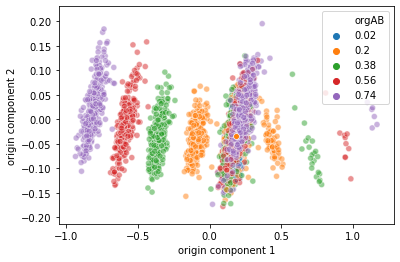

In [8]:
                 # PCA PLOTSSSS test for colors

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
sequence = "1000"

##UNCOMMENT FOR FASTTRESS
col=['V1','V2','V3','V4','V5','V6','V7']
df = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/new_Fasttree_" + sequence + ".csv",usecols=col)
df2 = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/new_Fasttree_" + sequence + ".csv")
df.loc[31250]= [0,0,0,0,0,0,0]

#UNCOMMENT FOR MRBAYES
# col=['c_ab','c_de','V3','V4','V5','V6','V7']
# df = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_" + sequence + "_full.csv",usecols=col)
# df2 = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_" + sequence + "_full.csv")
# df.loc[31250]= [0,0,0,0,0,0,0]


features = col
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
# y = df.loc[:,['orgAB']].values

df2.loc[31250] = 0
#df2['orgAB'] = df2['orgAB'].astype('category',copy=False)
y = df2['orgDE'].astype('category',copy=False)
y2 = df2['orgAB'].astype('category',copy=False)
#print(df2[['orgAB']])




#print(df2.dtypes)
# Standardizing the features
#x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
                   
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf = pd.concat([finalDf, y2], axis = 1)
#print(finalDf)  

#UNCOMMENT THIS TO NARROW THE SAMPLE SIZE DATA SET TO HAVE A MORE SPECIFIC VIEW
# finalDf = finalDf.sample(5000)

#UNCOMMENT TO JUST HAVE THE DATA FOR AN SPECIFIC VALUE IN THE HUE, NEED TO MODIFY THE VALUES
finalDf = finalDf[finalDf.orgDE == 0.02]
# print(finalDf)

originData = {'origin component 1':[principalDf.at[31250,'principal component 1']],'origin component 2': [principalDf.at[31250,'principal component 2']]}
principalOrigin = pd.DataFrame(originData, columns = ['origin component 1','origin component 2'])

image = sns.scatterplot(x="principal component 1", y="principal component 2", data=finalDf, hue = "orgAB" , alpha = 0.5 )

#UNCOMMENT THIS FOR DIFFERENT COLOR PALLETE
#image = sns.scatterplot(x="principal component 1", y="principal component 2", data=finalDf, hue = "orgAB" , alpha = 0.5 ,palette= "hls")
image = sns.scatterplot(x="origin component 1", y="origin component 2", data=principalOrigin)


fig = image.get_figure()
fig.savefig(data_dir + "test_1000_Fasttree_" + sequence + "_0.02_orgDE_hue'orgAB'_PCA.png") 






print(principalDf)
print(principalOrigin)

In [5]:
import pandas as pd

seqNum = '500'
#csv_dir = data_dir + "MrBayes_" + seqNum + "_full.csv"
est_data5  = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/MrBayes_" + seqNum + "_full.csv")

est_data5['topology'].value_counts()

ab,de    26244
be,cd     1563
ab,ce      887
ab,cd      863
ac,de      832
bc,de      752
ad,ce       30
bd,ce       28
ae,cd       17
ad,be        7
ac,bd        7
ae,bd        6
ac,be        6
ae,bc        4
ad,bc        4
Name: topology, dtype: int64

In [1]:
import pandas as pd
import statistics as st

seqNum = '500'
#csv_dir = data_dir + "MrBayes_" + seqNum + "_full.csv"
df  = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/RAxML_dataset_" + seqNum + ".csv")

# CODE TO GET AN AVERAGE OF THE VI'S BY TAKING THE MEAN EVERY 10 ROWS, CODE SET FOR FASTTREE
# FOR MRBAYES REPLACE V1 AND V2 FOR c_V1 and c_V2
dfinal = pd.DataFrame(0, index= range(1,3126),columns = ['V1','V2','V3','V4','V5','V6','V7',])

for j in range(0,31250,10):
    
    for m in range(1,8,1):
    
        x  = df.at[(1 + j) - 1,'V{}'.format(m)]
        x1 = df.at[(2 + j) - 1,'V{}'.format(m)]
        x2 = df.at[(3 + j) - 1,'V{}'.format(m)]
        x3 = df.at[(4 + j) - 1,'V{}'.format(m)]
        x4 = df.at[(5 + j) - 1,'V{}'.format(m)]
        x5 = df.at[(6 + j) - 1,'V{}'.format(m)]
        x6 = df.at[(7 + j) - 1,'V{}'.format(m)]
        x7 = df.at[(8 + j) - 1,'V{}'.format(m)]
        x8 = df.at[(9 + j) - 1,'V{}'.format(m)]
        x9 = df.at[(10 + j) - 1,'V1']
        xM = st.mean([x,x1,x2,x3,x4,x5,x6,x7,x8,x9])

        dfinal.loc[(1 + (j/10)),'V{}'.format(m)] = xM
    
# for j in range(0,31250,10):
    
#     x  = df.at[(1 + j) - 1,'V2']
#     x1 = df.at[(2 + j) - 1,'V2']
#     x2 = df.at[(3 + j) - 1,'V2']
#     x3 = df.at[(4 + j) - 1,'V2']
#     x4 = df.at[(5 + j) - 1,'V2']
#     x5 = df.at[(6 + j) - 1,'V2']
#     x6 = df.at[(7 + j) - 1,'V2']
#     x7 = df.at[(8 + j) - 1,'V2']
#     x8 = df.at[(9 + j) - 1,'V2']
#     x9 = df.at[(10 + j) - 1,'V2']
#     xM = st.mean([x,x1,x2,x3,x4,x5,x6,x7,x8,x9])
    
#     dfinal.loc[(1 + (j/10)),'V2'] = xM    
    

#     print("mean is = " + str(xM))
# #     print("number is =" + str(2 + j))
# #     print(x1)
#     print("number is =" + str(1 + j))
#     print(x)
#     print("number is =" + str(10 + j))
#     print(x9)


print(dfinal)
dfinal.to_csv('/Users/Eric Aragundi/Desktop/anaconda files/RAxML_dataset_500_averagesVI.csv',index=False)
print("CSV SAVED!!!")


            V1        V2        V3        V4        V5        V6        V7
1    -0.005728 -0.000466 -0.018235  0.004210  0.001467 -0.023030 -0.001581
2    -0.022474 -0.004175 -0.032288 -0.003634 -0.002307 -0.009915 -0.013254
3    -0.019669 -0.010976 -0.024103 -0.003558  0.000887 -0.027554 -0.042445
4    -0.024330 -0.006744 -0.013586  0.000917 -0.002829  0.016614 -0.029517
5    -0.023985 -0.007006 -0.002298 -0.005409 -0.002473 -0.028402 -0.104392
...        ...       ...       ...       ...       ...       ...       ...
3121 -0.280684 -0.367235 -0.071281 -0.153174 -0.227029 -0.094624 -0.049125
3122 -0.376817 -0.121661 -0.092214 -0.089680 -0.160557 -0.123124 -0.025211
3123 -0.220379 -0.166647 -0.065920 -0.182343 -0.177378 -0.119614 -0.095983
3124 -0.362256 -0.384537 -0.119557 -0.234035 -0.300240 -0.277737 -0.238963
3125 -0.427841 -0.223566 -0.019311 -0.246839 -0.195598 -0.097548 -0.236848

[3125 rows x 7 columns]
CSV SAVED!!!


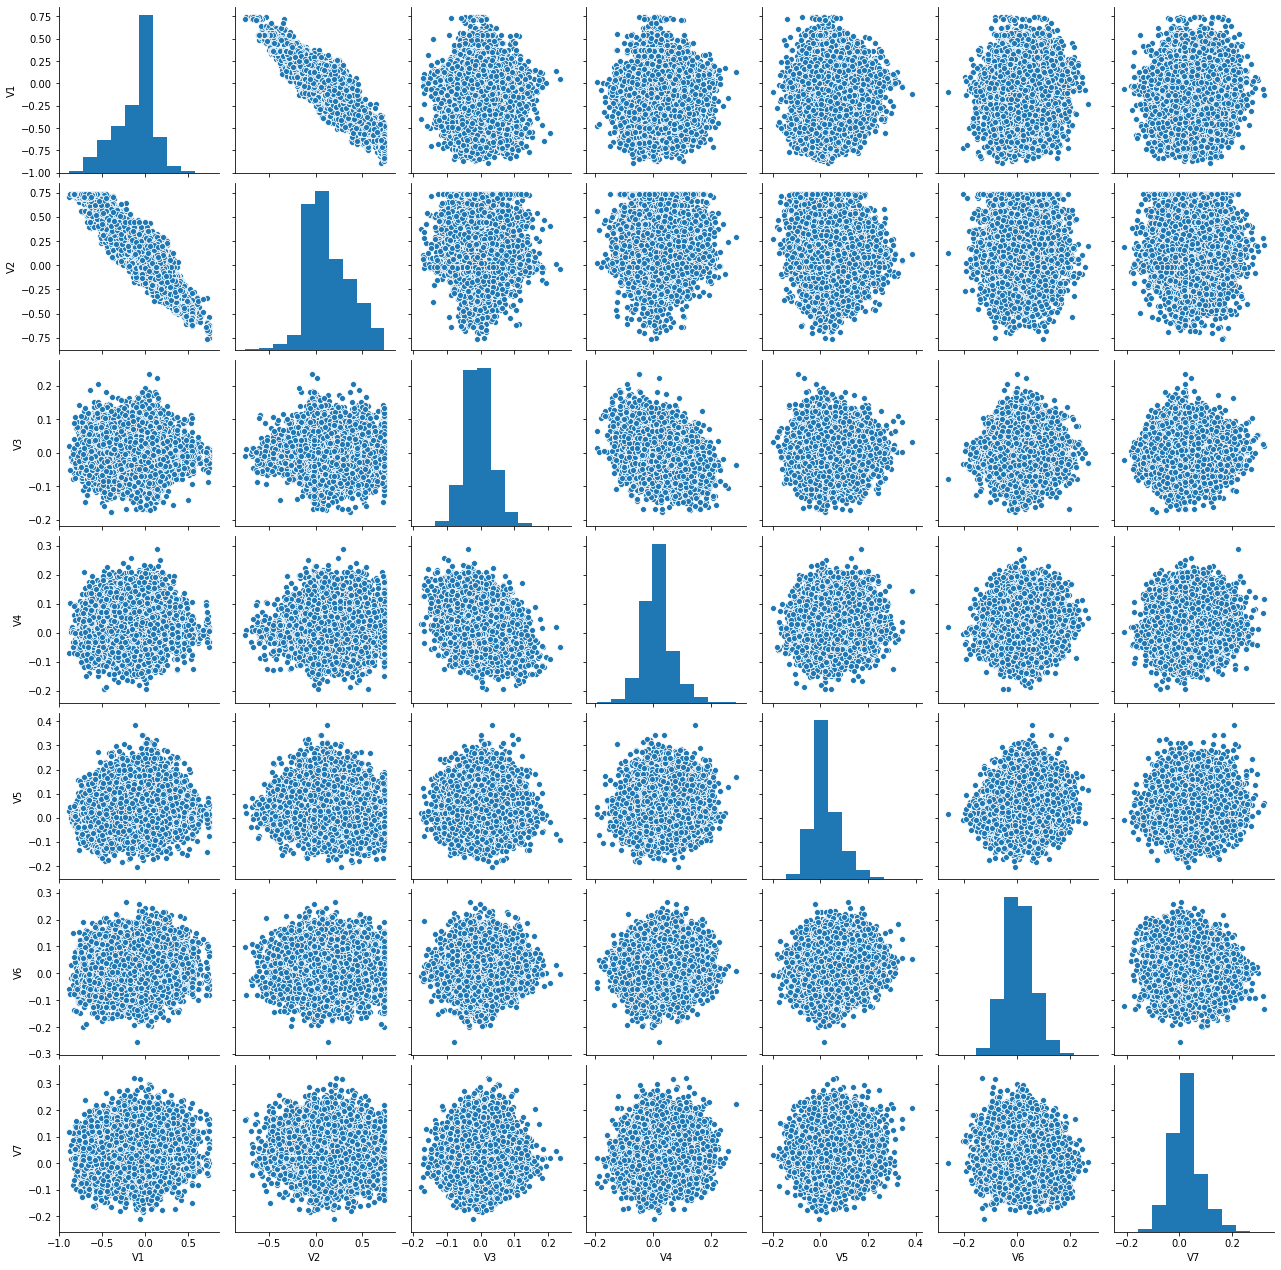

In [22]:
#SCATTER PLOT FOR V1 ann V2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
sequence = "1000"

##UNCOMMENT FOR FASTTRESS
col=['V1','V2','V3','V4','V5','V6','V7']
df = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/new_Fasttree_" + sequence + ".csv",usecols=col)
df2 = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/new_Fasttree_" + sequence + ".csv")

#sns.scatterplot(data = df,x = 'V1',y= 'V2')
sns.pairplot(df)

R^2: 0.8339013687439496
Coefficients
-0.9077508512155986 0.033951425275668606
least square lines:    y= -0.9077508512155986x + 0.033951425275668606


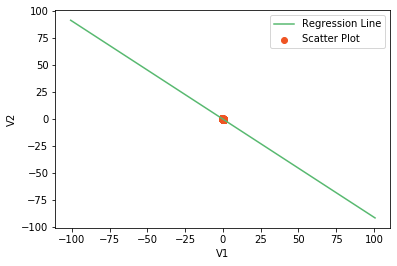

In [11]:
#linear regresssion between V1 and V2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
sequence = "1000"

col=['V1','V2','V3','V4','V5','V6','V7']
df = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/new_Fasttree_" + sequence + ".csv",usecols=col)
df2 = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/new_Fasttree_" + sequence + ".csv")

x = np.array(df['V1']).reshape((-1, 1))
y = np.array(df['V2'])
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('R^2:', r_sq)


# Coomputing X and Y
X = df2['V1'].values
Y = df2['V2'].values
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
 
# Printing coefficients
print("Coefficients")
print(m, c)
print("least square lines:    y= " + str(m) + "x + " + str(c))

# Plotting Values and Regression Line
 
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()
plt.savefig('new_MrBayes_violin_C_AB_orgAB_.png')

In [2]:
# Comparison between the estimated trees mean and original trees mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

from sklearn.linear_model import LinearRegression

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
sequence = "1000"

dft = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/new_Fasttree_" + sequence + ".csv")
dft = dft[dft.topology == 'ab,de']
sum1 = dft['ab'] + dft['de']
estmean = np.mean(sum1)
eststd = np.std(sum1)
print("estimated lenghts mean of the sum = "+ str(estmean))
print("estimated lenghts std of the sum = "+ str(eststd) + "\n")

sum2 = dft['orgAB'] + dft['orgDE']
orgmean = np.mean(sum2)
orgstd = np.std(sum2)
print("original lenghts mean of the sum = "+ str(orgmean))
print("estimated lenghts std of the sum = "+ str(orgstd) + "\n")

ttest,pval = ttest_ind(sum1,sum2)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

estimated lenghts mean of the sum = 0.7825760433503461
estimated lenghts std of the sum = 0.3179435947252775

original lenghts mean of the sum = 0.812958921455368
estimated lenghts std of the sum = 0.3476020963304044

p-value 4.431611625800087e-26
we reject null hypothesis


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

data_dir = "/Users/Eric Aragundi/Desktop/anaconda files/"
sequence = "1000"


df = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/Fasttree_" + sequence + "_fix.csv")
df1 = pd.read_csv("C:/Users/Eric Aragundi/Desktop/anaconda files/Fasttree_" + sequence + ".csv")

x = df['V1']-df1['V1']
#(x > 0.0002).sum()
np.where(x > 0.0002)
df1.loc[807]
#Estimated_Tree_B02_1M02_C38_2M20_E74_010.txt

a             0.29037
b             0.01894
c              0.6252
d             0.55448
e             0.00055
ab            0.00055
ac                  0
ad                  0
ae                  0
bc                  0
bd                  0
be                  0
cd                  0
ce                  0
de            0.22883
V1            0.01945
V2           -0.02883
V3           -0.04037
V4            0.00106
V5            -0.0652
V6           -0.05448
V7            0.01945
orgB             0.02
orgDE             0.2
orgC             0.56
orgAB            0.02
orgE             0.02
topology        ab,de
wrong_topo          0
Name: 807, dtype: object